In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot data, visualizations
import seaborn as sns #visualization with seaborn

from pandas import Series
from sklearn.preprocessing import StandardScaler  # scaling dataset
from sklearn.decomposition import PCA # Principal Component Analysis
from sklearn.model_selection import train_test_split # split data into train and test dataset
from sklearn.linear_model import LinearRegression, Lasso, Ridge # linear regression, Lasso Regression , Ridge Regression
from sklearn.metrics import mean_squared_error # Mean Squared Error

import sys
import os
print(os.listdir("D:\DataScience@DKB\Regression")) # Files for analysis

['.ipynb_checkpoints', 'Automobile_data.csv', 'data_ausw_bi.csv', 'Einsteiger-Kurs 5.pdf', 'Linear_Regression.ipynb', 'regression_info.pdf']


In [2]:
#load data and print first 5 rows
df = pd.read_csv('D:\DataScience@DKB\Regression\data_ausw_bi.csv')
print(df.head(5))

       Dauer  Zieldauer  Stufe  Art  werbe     kunde     daten  adresse  \
0   1.844444  10.257639      0    1    0.0  0.066667  0.133333      0.0   
1   2.988194  13.499306      1    1    0.0  0.027778  0.000000      0.0   
2   1.972222   4.513194      1    1    0.0  0.047619  0.000000      0.0   
3   7.944444  12.407639      1    1    0.0  0.040000  0.000000      0.0   
4  13.022222  19.520833      0    0    0.0  0.042254  0.000000      0.0   

       pers     karte    ...     status      darl  liste  feld  world  \
0  0.066667  0.000000    ...        0.0  0.000000    0.0   0.0    0.0   
1  0.000000  0.027778    ...        0.0  0.000000    0.0   0.0    0.0   
2  0.000000  0.000000    ...        0.0  0.047619    0.0   0.0    0.0   
3  0.000000  0.000000    ...        0.0  0.000000    0.0   0.0    0.0   
4  0.000000  0.000000    ...        0.0  0.000000    0.0   0.0    0.0   

   kontoinhaber  auswertung  inhaber    person    nummer  
0           0.0    0.000000      0.0  0.066667  0.0

In [3]:
#show basic statistics
df.describe()

,Dauer,Zieldauer,Stufe,Art,werbe,kunde,daten,adresse,pers,karte,...,status,darl,liste,feld,world,kontoinhaber,auswertung,inhaber,person,nummer
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,28.957355,16.404632,0.295652,0.678261,0.001918,0.033882,0.017042,0.007342,0.014322,0.020283,...,0.005624,0.013294,0.005481,0.005851,0.004100,0.015210,0.016180,0.015473,0.014270,0.021674
std,20.851279,13.558253,0.458332,0.469188,0.012630,0.042533,0.026676,0.022386,0.027774,0.037992,...,0.013375,0.039541,0.015325,0.014650,0.018571,0.027891,0.025555,0.028287,0.027784,0.033635
min,0.010417,-0.668750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.721875,6.609722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.793750,13.486111,0.000000,1.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.576042,20.979514,1.000000,1.000000,0.000000,0.058824,0.027212,0.000000,0.018118,0.029437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.019615,0.028992,0.018017,0.018118,0.039231
max,82.000000,65.520833,1.000000,1.000000,0.105769,0.285714,0.133333,0.100000,0.142857,0.184783,...,0.062500,0.285714,0.076923,0.100840,0.116279,0.100000,0.166667,0.100000,0.142857,0.153846


In [4]:
#show data types
df.dtypes

#copy data to new df
df_c = df.copy()

#TEST DATA Kaggle Data Automobile_data
#remove data with "?"
#df_c = df_c[df_c['horsepower'] != '?']
#df_c = df_c[df_c['price'] != '?']
#df_c = df_c[df_c['peak-rpm'] != '?']




In [106]:
#TEST DATA Kaggle Data Automobile_data
#transform data to float and int
#df_c['horsepower'] = df_c['horsepower'].astype(int)
#df_c['price'] = df_c['price'].astype(float)

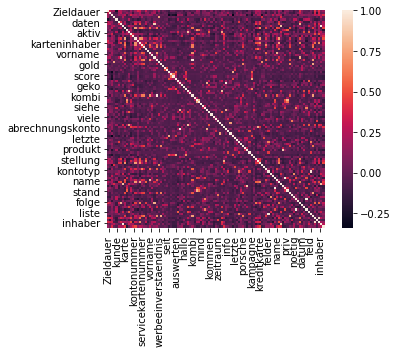

In [219]:
#make correlation heatmap using seaborn lib
#subset the data (remove target)
df1 = df_c.drop('Dauer',1)
#print(df1)
#calculate correlations between dimensions
cor = df1.corr()
#print(cor)
#print(sns.__version__)
#show heatmap with correlations
sns.heatmap(cor, square = True)
plt.show()

In [220]:
#subset data in target (dependent variable) and dimensions (independent variabes) 
X = df1 #[['horsepower','highway-mpg','wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','city-mpg']]
print(X.shape)
y = df_c[['Dauer']]
print(y.shape)

print(X.head(2))
print(y.head(2))


(115, 103)
(115, 1)
   Zieldauer  Stufe  Art  werbe     kunde     daten  adresse      pers  \
0  10.257639      0    1    0.0  0.066667  0.133333      0.0  0.066667   
1  13.499306      1    1    0.0  0.027778  0.000000      0.0  0.000000   

      karte      cash    ...     status  darl  liste  feld  world  \
0  0.000000  0.000000    ...        0.0   0.0    0.0   0.0    0.0   
1  0.027778  0.055556    ...        0.0   0.0    0.0   0.0    0.0   

   kontoinhaber  auswertung  inhaber    person    nummer  
0           0.0         0.0      0.0  0.066667  0.000000  
1           0.0         0.0      0.0  0.000000  0.027778  

[2 rows x 103 columns]
      Dauer
0  1.844444
1  2.988194


In [221]:
#divide data into train and test (scikit-learn function train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, #Testsize
                                                    random_state = None) #random selection of rows 

print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

    Zieldauer  Stufe  Art  werbe     kunde  daten  adresse  pers     karte  \
17   6.545833      0    1    0.0  0.055556    0.0      0.0   0.0  0.092593   

    cash    ...     status  darl     liste  feld  world  kontoinhaber  \
17   0.0    ...        0.0   0.0  0.037037   0.0    0.0      0.018519   

    auswertung   inhaber  person    nummer  
17         0.0  0.037037     0.0  0.018519  

[1 rows x 103 columns]
    Zieldauer  Stufe  Art  werbe     kunde     daten  adresse  pers  karte  \
68   18.25625      0    1    0.0  0.029412  0.058824      0.0   0.0    0.0   

        cash    ...       status  darl  liste  feld  world  kontoinhaber  \
68  0.029412    ...     0.029412   0.0    0.0   0.0    0.0           0.0   

    auswertung  inhaber  person    nummer  
68         0.0      0.0     0.0  0.029412  

[1 rows x 103 columns]
        Dauer
17  15.166667
        Dauer
68  60.830556


In [222]:
#Linear (multivariate) Regression
lm = LinearRegression()

#train linear model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [257]:
#Lasso Regression
ls = Lasso(alpha=0.1)

#train linear model
ls.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [267]:
#Ridge Regression
lr = Ridge(alpha=1.0)

#train linear model
lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [270]:
#results
print('  Results on Linear, Lasso and Ridge Regression:')
print('  R2 Train lm: ', lm.score(X_train, y_train))
print('  R2 Test lm: ', lm.score(X_test, y_test))
print('  R2 Train lasso: ', ls.score(X_train, y_train))
print('  R2 Test lasso: ', ls.score(X_test, y_test))
print('  R2 Train ridge: ', lr.score(X_train, y_train))
print('  R2 Test ridge: ', lr.score(X_test, y_test))


Results on Linear, Lasso and Ridge Regression:
R2 Train lm:  1.0
R2 Test lm:  -5.19106661796
R2 Train lasso:  0.636350153151
R2 Test lasso:  0.616339427027
R2 Train ridge:  0.659812527557
R2 Test ridge:  0.614717581946


In [224]:
#scaling/normalize the data
scaler = StandardScaler()
sc_X = scaler.fit_transform(X)
print(sc_X.shape)
print(sc_X)

(115, 103)
[[-0.45536061 -0.64788354  0.68873723 ..., -0.54937764  1.89415402
  -0.6472187 ]
 [-0.21522249  1.54348727  0.68873723 ..., -0.54937764 -0.51584594
   0.18226491]
 [-0.88090101  1.54348727  0.68873723 ..., -0.54937764 -0.51584594
  -0.6472187 ]
 ..., 
 [-0.35586894 -0.64788354  0.68873723 ..., -0.54937764  2.26492324
   3.94684436]
 [-0.7465821  -0.64788354  0.68873723 ..., -0.54937764 -0.51584594
  -0.6472187 ]
 [-0.72986298 -0.64788354  0.68873723 ..., -0.54937764 -0.51584594
  -0.6472187 ]]


In [225]:
#apply PCA to dataset (use 20 components)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(sc_X)
pca_X = pd.DataFrame(data = principalComponents)

print(pca_X.head(5))


         0         1         2         3         4         5         6   \
0 -1.269033 -0.264189  2.167002 -1.668232  3.601824  0.258020  1.222649   
1 -0.030690 -1.960012  0.587221  3.014384  0.579607 -2.024786 -3.237634   
2 -2.978362 -0.249505  2.318830  1.967646 -1.287829 -1.926738 -1.227707   
3 -1.431166 -0.110536 -0.451421 -0.921120  0.803971 -5.806244 -0.617748   
4 -2.783896 -1.337307 -0.818895  0.079374 -1.944643 -1.753595 -2.336504   

         7         8         9         10        11        12        13  \
0  0.480747 -0.822182  1.040231 -0.668009 -3.859348 -3.053031  1.049761   
1 -1.556366 -0.112572  3.879718 -1.703667  1.911808  1.181185 -1.207429   
2 -3.904831 -3.736688 -1.146052 -1.841254  2.680163 -1.772510  0.899825   
3  1.286527  5.340782  0.063790  0.187782  1.801376 -0.509942  1.033059   
4 -1.353436 -2.863759  1.117230  0.801352  0.033741 -1.299073 -1.548932   

         14        15        16        17        18        19  
0  1.423990 -1.366133 -1.513169 -1

In [226]:
pca.explained_variance_ratio_

array([ 0.08957912,  0.06469937,  0.05932639,  0.05103413,  0.04605594,
        0.03733123,  0.03596583,  0.03211381,  0.03132811,  0.0280944 ,
        0.02770327,  0.02369688,  0.02306648,  0.02209205,  0.02148747,
        0.01984715,  0.01908448,  0.01860089,  0.01824018,  0.01657914])

In [229]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(pca_X, y, 
                                                    test_size = 0.3, #Testsize
                                                    random_state = None) #random selection of rows 

In [230]:
#Linear (multivariate) Regression
lm_sc = LinearRegression()
#train linear model
lm_sc.fit(X_train_sc, y_train_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [341]:
#Lasso Regression
ls_sc = Lasso(alpha=0.01)
#train model
ls_sc.fit(X_train_sc, y_train_sc)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [342]:
#Ridge Regression
lr_sc = Ridge(alpha=0.5)
#train model
lr_sc.fit(X_train_sc, y_train_sc)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [343]:
#results
print('-----------------------------------------------')
print('Model without adjustments to data')
print('-----------------------------------------------')

print('Results on Linear Regression:')
print('R2 Train: ', lm.score(X_train, y_train))
print('adj R2 Train', 1-(1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('R2 Test: ', lm.score(X_test, y_test))
print('adj R2 Test', 1-(1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('-----------------------------------------------')

print('Results on Lasso Regression:')
print('R2 Train: ', ls.score(X_train, y_train))
print('adj R2 Train', 1-(1-ls.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('R2 Test: ', ls.score(X_test, y_test))
print('adj R2 Test', 1-(1-ls.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('-----------------------------------------------')

print('Results on Ridge Regression:')
print('R2 Train: ', lr.score(X_train, y_train))
print('adj R2 Train', 1-(1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('R2 Test: ', lr.score(X_test, y_test))
print('adj R2 Test', 1-(1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

#print('Beta: ', lm.coef_)

print('-----------------------------------------------')
#results (with scaled data and pca)
print('Model with scaled data and pca')
print('-----------------------------------------------')

print('Results on Linear Regression:')
print('R2 Train SC: ', lm_sc.score(X_train_sc, y_train_sc))
print('adj R2 Train SC', 1-(1-lm_sc.score(X_train_sc, y_train_sc))*(len(y_train_sc)-1)/(len(y_train_sc)-X_train_sc.shape[1]-1))
print('R2 Test SC: ', lm_sc.score(X_test_sc, y_test_sc))
print('adj R2 Test SC', 1-(1-lm_sc.score(X_test_sc, y_test_sc))*(len(y_test_sc)-1)/(len(y_test_sc)-X_test_sc.shape[1]-1))
print('-----------------------------------------------')

print('Results on Lasso Regression:')
print('R2 Train SC: ', ls_sc.score(X_train_sc, y_train_sc))
print('adj R2 Train SC', 1-(1-ls_sc.score(X_train_sc, y_train_sc))*(len(y_train_sc)-1)/(len(y_train_sc)-X_train_sc.shape[1]-1))
print('R2 Test SC: ', ls_sc.score(X_test_sc, y_test_sc))
print('adj R2 Test SC', 1-(1-ls_sc.score(X_test_sc, y_test_sc))*(len(y_test_sc)-1)/(len(y_test_sc)-X_test_sc.shape[1]-1))
print('-----------------------------------------------')

print('Results on Ridge Regression:')
print('R2 Train SC: ', lr_sc.score(X_train_sc, y_train_sc))
print('adj R2 Train SC', 1-(1-lr_sc.score(X_train_sc, y_train_sc))*(len(y_train_sc)-1)/(len(y_train_sc)-X_train_sc.shape[1]-1))
print('R2 Test SC: ', lr_sc.score(X_test_sc, y_test_sc))
print('adj R2 Test SC', 1-(1-lr_sc.score(X_test_sc, y_test_sc))*(len(y_test_sc)-1)/(len(y_test_sc)-X_test_sc.shape[1]-1))

#print('Beta: ', lm_sc.coef_)

-----------------------------------------------
Model without adjustments to data
-----------------------------------------------
Results on Linear Regression:
R2 Train:  1.0
adj R2 Train 1.0
R2 Test:  -5.19106661796
adj R2 Test 4.0506705074
-----------------------------------------------
Results on Lasso Regression:
R2 Train:  0.636350153151
adj R2 Train 2.19701407921
R2 Test:  0.616339427027
adj R2 Test 1.18905013741
-----------------------------------------------
Results on Ridge Regression:
R2 Train:  0.659812527557
adj R2 Train 2.11978376346
R2 Test:  0.614717581946
adj R2 Test 1.18984930745
-----------------------------------------------
Model with scaled data and pca
-----------------------------------------------
Results on Linear Regression:
R2 Train SC:  0.559021569705
adj R2 Train SC 0.409537356046
R2 Test SC:  0.160479416624
adj R2 Test SC -1.03883570248
-----------------------------------------------
Results on Lasso Regression:
R2 Train SC:  0.559019800114
adj R2 Train SC

In [344]:
#Predict y on test data
y_pred = lm.predict(X_test)
#print(y_pred)
y_pred_sc = lm_sc.predict(X_test_sc)
#print(y_pred_sc)

y_pred_ls = ls.predict(X_test)
y_pred_sc_ls = ls_sc.predict(X_test_sc)

y_pred_lr = lr.predict(X_test)
y_pred_sc_lr = lr_sc.predict(X_test_sc)


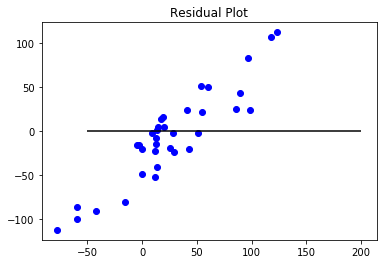

In [345]:
#residuals plot lm
x_plot = plt.scatter(y_pred, (y_pred - y_test),c='b')
plt.hlines(y=0, xmin= -50, xmax=200)
plt.title('Residual Plot')
plt.show()




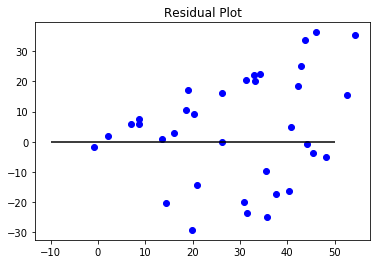

In [346]:
#residuals plot lm_sc
x_plot = plt.scatter(y_pred_sc, (y_pred_sc - y_test_sc),c='b')
plt.hlines(y=0, xmin= -10, xmax=50)
plt.title('Residual Plot')
plt.show()

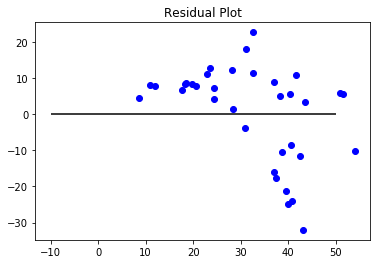

In [347]:
#residuals plot lr
x_plot = plt.scatter(y_pred_lr, (y_pred_lr - y_test),c='b')
plt.hlines(y=0, xmin= -10, xmax=50)
plt.title('Residual Plot')
plt.show()

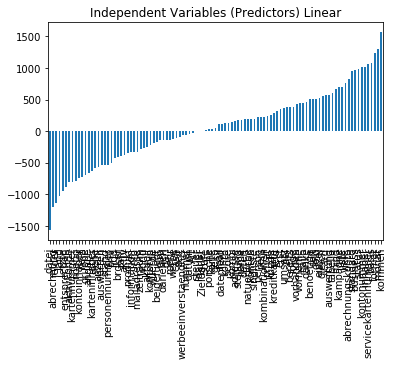

In [348]:
#plot coefficients lm
pred = X_train.columns
coef_rs = lm.coef_.reshape(103)
coef = Series(coef_rs,pred).sort_values()
coef.plot(kind='bar', title='Independent Variables (Predictors) Linear')
plt.show()

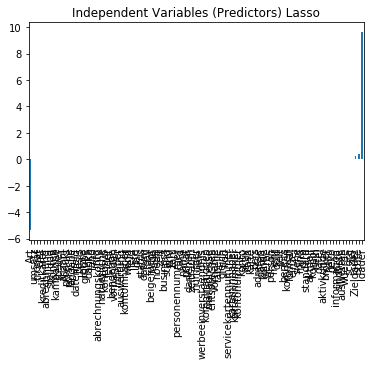

In [349]:
#plot coefficients ls
pred = X_train.columns
coef_rs = ls.coef_.reshape(103)
coef = Series(coef_rs,pred).sort_values()
coef.plot(kind='bar', title='Independent Variables (Predictors) Lasso')
plt.show()

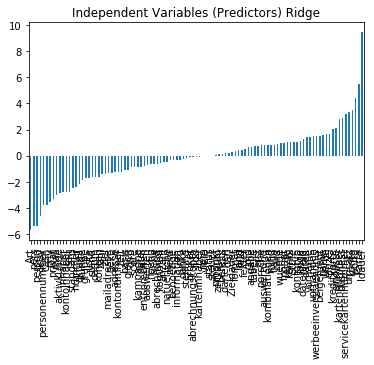

In [350]:
#plot coefficients lr
pred = X_train.columns
coef_rs = lr.coef_.reshape(103)
coef = Series(coef_rs,pred).sort_values()
coef.plot(kind='bar', title='Independent Variables (Predictors) Ridge')
plt.show()

In [278]:
#Model Evaluation
#MSE
print('-----------------------------------------------')
print('Model Evaluation')
print('-----------------------------------------------')
print('Linear Regression')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE lm:', mean_squared_error(y_test, y_pred))
print('MSE lm_sc & pca: ', mean_squared_error(y_test_sc, y_pred_sc))
print('-----------------------------------------------')
#RMSE (Root MSE)
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE lm:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSE lm_sc & pca: ',np.sqrt(mean_squared_error(y_test_sc, y_pred_sc)))
print('-----------------------------------------------')

print('Lasso Regression')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE ls:', mean_squared_error(y_test, y_pred_ls))
print('MSE ls_sc & pca: ', mean_squared_error(y_test_sc, y_pred_sc_ls))
print('-----------------------------------------------')
#RMSE (Root MSE)
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE ls:',np.sqrt(mean_squared_error(y_test, y_pred_ls)))
print('RMSE ls_sc & pca: ',np.sqrt(mean_squared_error(y_test_sc, y_pred_sc_ls)))
print('-----------------------------------------------')


print('Ridge Regression')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE lr:', mean_squared_error(y_test, y_pred_lr))
print('MSE lr_sc & pca: ', mean_squared_error(y_test_sc, y_pred_sc_lr))
print('-----------------------------------------------')
#RMSE (Root MSE)
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE ls:',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('RMSE ls_sc & pca: ',np.sqrt(mean_squared_error(y_test_sc, y_pred_sc_lr)))
print('-----------------------------------------------')

-----------------------------------------------
Model Evaluation
-----------------------------------------------
Linear Regression
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE lm: 2738.62568658
MSE lm_sc & pca:  326.666221866
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE lm: 52.3318802125
RMSE lm_sc & pca:  18.0739099773
-----------------------------------------------
Lasso Regression
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE ls: 169.712711058
MSE ls_sc & pca:  325.296589268
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE ls: 13.0273831239
RMSE ls_sc & pca:  18.0359804077
-----------------------------------------------
Ridge Regression
-----------------------------------------------
M